In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import jedi
import os
%matplotlib inline

In [9]:
def read_temper(n=4, location="."):
    all_lipid_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)
    
    all_energy_list = []
    for i in range(n):
        file = "energy.{}.dat".format(i)
        energy = pd.read_csv(location+file).assign(Run = i)
        energy.columns = energy.columns.str.strip()
        energy = energy[["Steps", "AMH-Go", "Membrane", "Rg", "Run"]]
        all_energy_list.append(energy)
    energy = pd.concat(all_energy_list)
    
    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log.lammps"
#     file = "../log0/log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
    temper["Run"] = temper["Run"].str[1:].astype(int)
    temper["Temp"] = "T" + temper["Temp"].astype(str) 
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t5 = t4.merge(energy, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t6 = t5.assign(TotalE = t5.Energy + t5.Lipid)
#     t6 = t6.assign(TotalE_perturb_mem_p = t6.TotalE + 0.1*t6.Membrane)
#     t6 = t6.assign(TotalE_perturb_mem_m = t6.TotalE - 0.1*t6.Membrane)
#     t6 = t6.assign(TotalE_perturb_lipid_p = t6.TotalE + 0.1*t6.Lipid)
#     t6 = t6.assign(TotalE_perturb_lipid_m = t6.TotalE - 0.1*t6.Lipid)
#     t6 = t6.assign(TotalE_perturb_go_p = t6.TotalE + 0.1*t6["AMH-Go"])
#     t6 = t6.assign(TotalE_perturb_go_m = t6.TotalE - 0.1*t6["AMH-Go"])
#     t6 = t6.assign(TotalE_perturb_rg_p = t6.TotalE + 0.1*t6.Rg)
#     t6 = t6.assign(TotalE_perturb_rg_m = t6.TotalE - 0.1*t6.Rg)
    return t6

In [ ]:
pre = "/Users/weilu/Research/server/nov_2017/06nov/23oct/"
data_folder = "/Users/weilu/Research/server/nov_2017/06nov/all_data_folder/"
folder_list = [
    "rgWidth_memb_3_rg_0.1_lipid_1_extended",
    "rgWidth_memb_3_rg_0.1_lipid_1_topology"
]
# folder_list = [
#    'rgWidth_memb_3_rg_0.1_lipid_1_awsemer_topology',
#     'rgWidth_memb_3_rg_0.1_lipid_1_awsemer_extended'
# ]
def process_temper_data(pre, data_folder, folder_list):
        for folder in folder_list:
        simulation_list = glob.glob(pre+folder+"/simulation/dis_*")
        os.system("mkdir -p " + pre+folder+"/data")
        for one_simulation in simulation_list:
            dis = one_simulation.split("_")[-1]
            print(dis)
            location = one_simulation + "/0/"
            try:
                data = read_temper(location=location, n=12)
            except:
                print("notrun?", dis)
    #         temps = list(dic.keys())
            data.reset_index().to_feather(pre+folder+"/data/"+f"dis{dis}.feather")
        os.system("mv "+pre+folder+"/data "+data_folder+folder)

In [26]:
dic.values()

dict_values([350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000])

In [43]:
remove_columns = ['index', 'Step', "Run", "Temp"]
tmp.drop(remove_columns, axis=1)
# tmp

,Qw,Energy,Distance,Lipid,AMH-Go,Membrane,Rg,TotalE,TotalE_perturb_mem_p,TotalE_perturb_mem_m,TotalE_perturb_lipid_p,TotalE_perturb_lipid_m,TotalE_perturb_go_p,TotalE_perturb_go_m,TotalE_perturb_rg_p,TotalE_perturb_rg_m
30011,0.668076,-995.850351,37.678876,-48.990580,-606.201997,-125.223610,7.024807,-1044.840931,-1069.885653,-1019.796209,-1049.739989,-1039.941873,-1105.461130,-984.220731,-1043.435969,-1046.245892
30015,0.602893,-1032.280748,46.317098,-45.435258,-596.711321,-130.595059,7.680508,-1077.716006,-1103.835017,-1051.596994,-1082.259531,-1073.172480,-1137.387138,-1018.044873,-1076.179904,-1079.252107
30029,0.656602,-1032.938684,44.973440,-44.766666,-605.901686,-130.639528,7.720444,-1077.705350,-1103.833255,-1051.577444,-1082.182016,-1073.228683,-1138.295518,-1017.115181,-1076.161261,-1079.249438
30037,0.696395,-1007.115298,35.775288,-47.387022,-609.970561,-126.513818,7.087159,-1054.502320,-1079.805084,-1029.199557,-1059.241023,-1049.763618,-1115.499377,-993.505264,-1053.084889,-1055.919752
30049,0.603081,-988.688490,45.300637,-44.312081,-586.521820,-128.372500,6.628446,-1033.000571,-1058.675071,-1007.326071,-1037.431780,-1028.569363,-1091.652753,-974.348389,-1031.674882,-1034.326261
30060,0.649465,-988.308515,45.354786,-46.710954,-582.327199,-125.374225,6.449168,-1035.019470,-1060.094315,-1009.944625,-1039.690565,-1030.348374,-1093.252190,-976.786750,-1033.729636,-1036.309303
30077,0.593453,-1009.117278,41.798578,-44.517386,-578.757454,-132.744258,6.586903,-1053.634664,-1080.183515,-1027.085812,-1058.086402,-1049.182925,-1111.510409,-995.758918,-1052.317283,-1054.952044
30091,0.661524,-1006.013167,44.575624,-45.549429,-605.745057,-127.291909,6.593242,-1051.562595,-1077.020977,-1026.104214,-1056.117538,-1047.007653,-1112.137101,-990.988090,-1050.243947,-1052.881244
30102,0.625821,-1012.671511,47.711065,-48.070447,-598.942281,-124.736674,7.241880,-1060.741958,-1085.689293,-1035.794623,-1065.549002,-1055.934913,-1120.636186,-1000.847730,-1059.293582,-1062.190334
30115,0.667495,-1037.768059,41.205821,-48.861184,-605.752107,-127.014070,7.044518,-1086.629243,-1112.032057,-1061.226429,-1091.515361,-1081.743125,-1147.204454,-1026.054032,-1085.220339,-1088.038147


In [51]:
data = tmp

In [57]:
list(dic.values())

dict_values([350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000])

TypeError: Empty 'DataFrame': no numeric data to plot

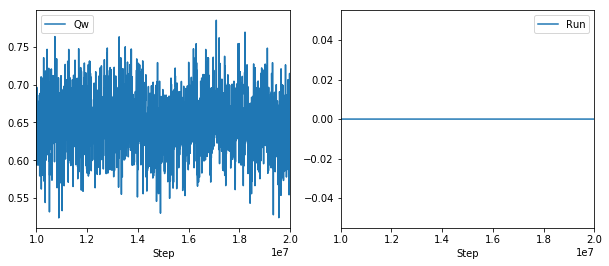

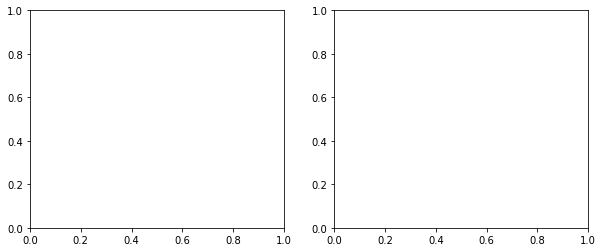

In [60]:
for i in list(dic.values()):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    tmp = data.query('Temp=={}'.format(i))
#     dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
#     tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'Run', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

In [46]:
test = pd.read_feather("/Users/weilu/Research/server/nov_2017/06nov/23oct/rgWidth_memb_3_rg_0.1_lipid_1_extended/data/dis116.0.feather")

In [48]:
test.filter(["Qw", "Distance"])

,Qw,Distance
0,0.047962,261.655736
1,0.047438,267.011803
2,0.040804,259.699212
3,0.046076,267.877017
4,0.048733,265.304885
5,0.047834,266.625359
6,0.042481,262.512521
7,0.046371,267.853999
8,0.048226,265.799768
9,0.047111,264.645578


In [41]:
data_folder = "/Users/weilu/Research/server/nov_2017/06nov/all_data_folder/"
freeEnergy_folder = "/Users/weilu/Research/server/nov_2017/06nov/all_freeEnergy_calculation/"
folder = "rgWidth_memb_3_rg_0.1_lipid_1_extended"

def move_data(data_folder, freeEnergy_folder, folder):
    os.system("mkdir -p "+freeEnergy_folder+folder)
    dis_list = glob.glob(data_folder+folder+"/dis*.feather")
    for dis_file in dis_list:
        dis = dis_file.split("/")[-1].replace('dis', '').replace('.feather', '')
        print(dis)
        t6 = pd.read_feather(dis_file)
        t6 = t6.assign(TotalE_perturb_mem_p = t6.TotalE + 0.2*t6.Membrane)
        t6 = t6.assign(TotalE_perturb_mem_m = t6.TotalE - 0.2*t6.Membrane)
        t6 = t6.assign(TotalE_perturb_lipid_p = t6.TotalE + 0.1*t6.Lipid)
        t6 = t6.assign(TotalE_perturb_lipid_m = t6.TotalE - 0.1*t6.Lipid)
        t6 = t6.assign(TotalE_perturb_go_p = t6.TotalE + 0.1*t6["AMH-Go"])
        t6 = t6.assign(TotalE_perturb_go_m = t6.TotalE - 0.1*t6["AMH-Go"])
        t6 = t6.assign(TotalE_perturb_rg_p = t6.TotalE + 0.2*t6.Rg)
        t6 = t6.assign(TotalE_perturb_rg_m = t6.TotalE - 0.2*t6.Rg)
        dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
        temps = list(dic.values())
        def convert(x):
            return dic[x]
        t6["Temp"] = t6["Temp"].apply(convert)

        for temp in temps:
            if temp > 600:
                continue
            tmp = t6.query('Temp=="{}"& Step > 1e7'.format(temp))
            remove_columns = ['index', 'Step', "Run", "Temp"]
            tmp = tmp.drop(remove_columns, axis=1)
            tmp.to_csv(freeEnergy_folder+folder+"/t_{}_dis_{}.dat".format(temp, dis), sep=' ', index=False, header=False)

146.0
142.0
214.0
38.0
60.0
124.0
76.0
224.0
210.0
62.0
192.0
206.0
184.0
136.0
190.0
170.0
212.0
230.0
110.0
150.0
86.0
204.0
96.0
198.0
64.0
94.0
202.0
182.0
220.0
102.0
180.0
166.0
158.0
172.0
72.0
216.0
78.0


KeyboardInterrupt: 

In [36]:
tmp

,index,Step,Run,Temp,Qw,Energy,Distance,Lipid,AMH-Go,Membrane,Rg,TotalE,TotalE_perturb_mem_p,TotalE_perturb_mem_m,TotalE_perturb_lipid_p,TotalE_perturb_lipid_m,TotalE_perturb_go_p,TotalE_perturb_go_m,TotalE_perturb_rg_p,TotalE_perturb_rg_m
30002,30009,10004000,4,600,0.284011,-340.357643,93.964520,-36.854568,-423.303708,-128.888153,11.515542,-377.212211,-402.989842,-351.434580,-380.897668,-373.526754,-419.542582,-334.881840,-374.909102,-379.515319
30022,30013,10008000,4,600,0.266048,-377.258783,89.500427,-37.906464,-426.325152,-124.195191,9.641516,-415.165248,-440.004286,-390.326209,-418.955894,-411.374601,-457.797763,-372.532732,-413.236944,-417.093551
30026,30033,10012000,4,600,0.290686,-392.642896,84.497429,-36.943941,-433.279441,-136.835006,11.510610,-429.586837,-456.953838,-402.219835,-433.281231,-425.892443,-472.914781,-386.258892,-427.284715,-431.888959
30046,30036,10016000,4,600,0.264812,-368.690297,90.410658,-34.171362,-439.357525,-129.362586,9.378652,-402.861659,-428.734176,-376.989142,-406.278795,-399.444523,-446.797411,-358.925906,-400.985929,-404.737389
30053,30054,10020000,4,600,0.289198,-427.515797,87.914899,-37.618500,-455.335194,-112.299752,10.086806,-465.134298,-487.594248,-442.674347,-468.896148,-461.372448,-510.667817,-419.600778,-463.116936,-467.151659
30064,30066,10024000,4,600,0.264662,-404.144197,89.491234,-32.709444,-450.718336,-135.325489,13.279796,-436.853641,-463.918739,-409.788543,-440.124585,-433.582696,-481.925474,-391.781807,-434.197682,-439.509600
30078,30076,10028000,4,600,0.271089,-402.182073,92.135866,-38.577434,-461.925568,-126.191554,9.810193,-440.759506,-465.997817,-415.521196,-444.617250,-436.901763,-486.952063,-394.566950,-438.797468,-442.721545
30090,30089,10032000,4,600,0.251748,-375.553644,97.581290,-37.283726,-441.652113,-119.856688,8.980900,-412.837370,-436.808708,-388.866032,-416.565743,-409.108997,-457.002581,-368.672159,-411.041190,-414.633550
30102,30100,10036000,0,600,0.290883,-395.755289,103.993272,-37.787416,-429.536005,-133.935673,8.118854,-433.542705,-460.329840,-406.755571,-437.321447,-429.763964,-476.496306,-390.589105,-431.918935,-435.166476
30115,30111,10040000,0,600,0.294799,-332.899667,96.405150,-32.871002,-418.333933,-138.214142,9.259736,-365.770669,-393.413497,-338.127841,-369.057769,-362.483569,-407.604062,-323.937276,-363.918722,-367.622616


In [ ]:
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
# assembly the data I need to do freeEnergy calculation.
do = os.system
freeEnergy_folder = "all_data_folder/"
data_folder = "/Users/weilu/Research/server/nov_2017/06nov/all_data_folder/"
folder = "rgWidth_memb_3_rg_0.1_lipid_1_extended"

do(f"mkdir -p all_freeEnergy_calculation/{folder}")


In [14]:
pre = "/Users/weilu/Research/server/nov_2017/06nov/23oct/"
data_folder = "/Users/weilu/Research/server/nov_2017/06nov/all_data_folder/"
folder_list = [
    "rgWidth_memb_3_rg_0.1_lipid_1_extended",
    "rgWidth_memb_3_rg_0.1_lipid_1_topology"
]
# folder_list = [
#    'rgWidth_memb_3_rg_0.1_lipid_1_awsemer_topology',
#     'rgWidth_memb_3_rg_0.1_lipid_1_awsemer_extended'
# ]

dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    simulation_list = glob.glob(pre+folder+"/simulation/*")
    os.system("mkdir -p " + pre+folder+"/data")
    for one_simulation in simulation_list:
        dis = one_simulation.split("_")[-1]
        print(dis)
        location = one_simulation + "/0/"
#         try:
#             data = read_temper(location=location, n=12)
#         except:
#             print("notrun?", dis)
# #         temps = list(dic.keys())
#         data.reset_index().to_feather(pre+folder+"/data/"+f"dis{dis}.feather")
    os.system("mv "+pre+folder+"/data "+data_folder+folder)
#         for temp in temps:
#             tmp = data.query('Temp=="{}"& Step > 1e7'.format(temp))
#             tmp.reset_index().to_feather(pre+folder+"/data/"+f"dis{dis}_t{dic[temp]}.feather")
#             tmp.to_csv(pre+folder+"/data/"+f"dis{dis}_t{dic[temp]}.dat", sep=' ', index=False, header=False)

86.0
84.0
116.0
222.0
76.0
208.0
228.0
128.0
160.0
72.0
186.0
54.0
70.0
220.0
154.0
132.0
226.0
144.0
50.0
56.0
198.0
176.0
184.0
80.0
168.0
158.0
120.0
210.0
196.0
206.0
214.0
30.0
190.0
192.0
148.0
88.0
44.0
134.0
152.0
46.0
194.0
166.0
204.0
96.0
38.0
200.0
62.0
112.0
212.0
110.0
188.0
142.0
218.0
216.0
156.0
126.0
118.0
114.0
164.0
48.0
108.0
180.0
34.0
146.0
36.0
182.0
106.0
60.0
40.0
78.0
74.0
66.0
172.0
52.0
94.0
104.0
202.0
162.0
82.0
98.0
140.0
124.0
68.0
122.0
224.0
92.0
64.0
42.0
230.0
58.0
178.0
150.0
170.0
130.0
90.0
136.0
100.0
102.0
138.0
174.0
32.0
86.0
84.0
116.0
222.0
76.0
208.0
228.0
128.0
160.0
72.0
186.0
54.0
70.0
220.0
154.0
132.0
226.0
144.0
50.0
56.0
198.0
176.0
184.0
80.0
168.0
158.0
120.0
210.0
196.0
206.0
214.0
30.0
190.0
192.0
148.0
88.0
44.0
134.0
152.0
46.0
194.0
166.0
204.0
96.0
38.0
200.0
62.0
112.0
212.0
110.0
188.0
142.0
218.0
216.0
156.0
126.0
118.0
114.0
164.0
48.0
108.0
180.0
34.0
146.0
36.0
182.0
106.0
60.0
40.0
78.0
74.0
66.0
172.0
52.0
94.0
104.0

In [23]:
# folder_list = [
#    '/Users/weilu/Research/server/oct_2017/23oct/rgWidth_memb_3_rg_0.1_lipid_1_topology/',
#     '/Users/weilu/Research/server/oct_2017/23oct/rgWidth_memb_3_rg_0.1_lipid_1_extended/'
# ]
pre = "/Users/weilu/Research/server/oct_2017/30oct/"
# folder_list = [
#    'rgWidth_memb_3_rg_0.1_lipid_1_extended'
# ]
folder_list = [
   'rgWidth_memb_3_rg_0.1_lipid_1_topology'
]
dis_list = np.linspace(30, 180, 151)
# dis_list = np.linspace(30, 230, 101)
# dis_list = np.linspace(132, 232, 51)
# dis_list = [30.0]
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    for dis in dis_list:
        print(dis)
        location = pre + folder + "/simulation/dis_{}/0/".format(dis)
        try:
            data = read_temper(location=location, n=12)
        except:
            print("notrun?", dis)
        temps = list(dic.keys())
        for temp in temps:
            tmp = data.query('Temp=="{}"& Step > 1e7'.format(temp))
            tmp.to_csv(location+"t{}_new.dat".format(dic[temp]), sep=' ', index=False, header=False)

30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
notrun? 39.0
40.0
notrun? 40.0
41.0
notrun? 41.0
42.0
notrun? 42.0
43.0
notrun? 43.0
44.0
notrun? 44.0
45.0
notrun? 45.0
46.0
47.0
notrun? 47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0


In [9]:
import os

In [25]:
# folder_list = [
#    '/Users/weilu/Research/server/oct_2017/23oct/rgWidth_memb_3_rg_0.1_lipid_1_topology/',
#     '/Users/weilu/Research/server/oct_2017/23oct/rgWidth_memb_3_rg_0.1_lipid_1_extended/'
# ]
pre = "/Users/weilu/Research/server/oct_2017/30oct/"
# folder_list = [
#    'rgWidth_memb_3_rg_0.1_lipid_1_extended'
# ]
folder_list = [
   'rgWidth_memb_3_rg_0.1_lipid_1_topology'
]
dis_list = np.linspace(30, 180, 151)
# dis_list = np.linspace(30, 230, 101)
# dis_list = np.linspace(132, 232, 51)
# dis_list = [30.0]
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    for dis in dis_list:
        print(dis)
        temps = list(dic.keys())
        location = pre + folder + "/simulation/dis_{}/0/".format(dis)
        for temp in temps:
            os.system(f"cp {location}t{dic[temp]}_new.dat {pre}{folder}/data/dis_{dis}_temp_{dic[temp]}.dat")

30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0


In [12]:
ls

Untitled.ipynb
angles.ipynb
lipid_Fluctuations.ipynb
native_structure_finder_final_aug23.ipynb
native_structure_finder_nov05.ipynb
pmf_plot.ipynb
read_data.ipynb
structure_prediction.ipynb
temper.ipynb
temper_nov05.ipynb
temper_oct15.ipynb
temper_oct21.ipynb
temper_oct24.ipynb
temper_oct31.ipynb
